### import Libraries & loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('../data_set/E-Commerce.csv', encoding='unicode_escape')

### data preprocessing

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.duplicated().sum()

5268

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop(['InvoiceNo','CustomerID'], axis=1)

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.isna().sum()

StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

### drop rows of Quantity or UnitPrice that less or equal to zero

In [14]:
df[(df['Quantity'] <=0) | (df['UnitPrice']<=0)].shape[0] / len(df)

0.01926242603052765

In [15]:
df = df[~((df['Quantity'] < 0) | (df['UnitPrice']<=0))]

In [16]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

<Axes: >

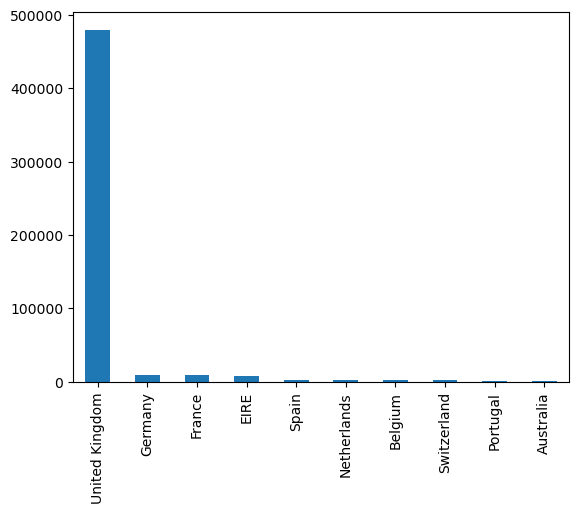

In [17]:
df['Country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

###### United Kingdom is the most selling country

### the top 5 country

In [18]:
top_countries = df['Country'].value_counts().sort_values(ascending=False).head().index
top_countries

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'], dtype='object')

In [19]:
top_prices_by_country = df.groupby('Country')['UnitPrice'].apply(lambda x: x.sort_values(ascending=False))
top_prices_by_country.groupby('Country').head(5)

Country            
Australia    142988    350.00
             108024     14.95
             228215     14.95
             108020     14.95
             108022     14.95
                        ...  
Unspecified  282744     16.95
             308808     16.95
             257242     16.95
             308810     16.95
             308802     14.95
Name: UnitPrice, Length: 190, dtype: float64

###### we saw that Australia  is the heighest unite price

In [20]:
df[df['Country'] == 'Australia'].describe()

,Quantity,UnitPrice
count,1181.000000,1181.000000
mean,71.033870,3.053133
std,98.781975,10.390344
min,1.000000,0.190000
25%,10.000000,1.250000
50%,32.000000,1.790000
75%,100.000000,3.750000
max,1152.000000,350.000000


In [21]:
df[df['Country'] == 'Australia']['UnitPrice']

197       8.50
198       4.95
199       1.25
200       5.45
201       6.35
          ... 
497681    2.95
497682    0.39
497683    0.85
497684    5.95
497685    2.95
Name: UnitPrice, Length: 1181, dtype: float64

### top sold products

In [22]:
df['StockCode'].nunique()

3922

In [23]:
top_stokes = df['StockCode'].value_counts().head(20).index
top_stokes

Index(['85123A', '85099B', '22423', '47566', '20725', '84879', '22197',
       '22720', '21212', '22383', '20727', '22457', '23203', '22386', '22469',
       '21931', '22086', '22411', '22382', '22961'],
      dtype='object')

Text(0.5, 1.0, 'Mean Prices for each Month')

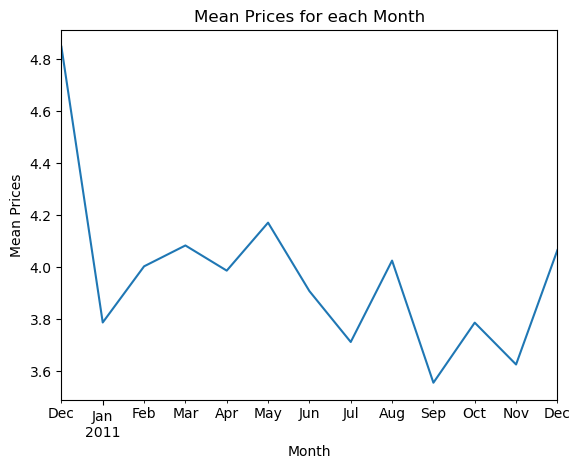

In [24]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M')).mean()['UnitPrice'].plot(stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean Prices')
plt.title('Mean Prices for each Month')

Text(0.5, 1.0, 'Sum Quantity for each Day')

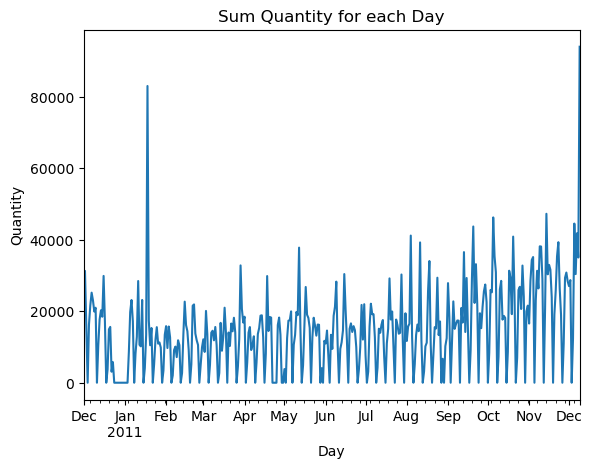

In [25]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='d')).sum()['Quantity'].plot(stacked=True)
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Sum Quantity for each Day')

In [26]:
df['Month'] = df['InvoiceDate'].dt.month

In [27]:
df['Day_of_month'] = df['InvoiceDate'].dt.day

In [28]:
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [29]:
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Day_of_month,Day_of_week
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,12,1,2
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,12,1,2
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,12,1,2
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,12,1,2
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,12,1,2
...,...,...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,12,9,4
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12,9,4
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,12,9,4
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,12,9,4


### Top descriptions

In [30]:
df['Description'].nunique()

4026

In [31]:
df['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2311
JUMBO BAG RED RETROSPOT               2109
REGENCY CAKESTAND 3 TIER              2007
PARTY BUNTING                         1699
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64

<Axes: >

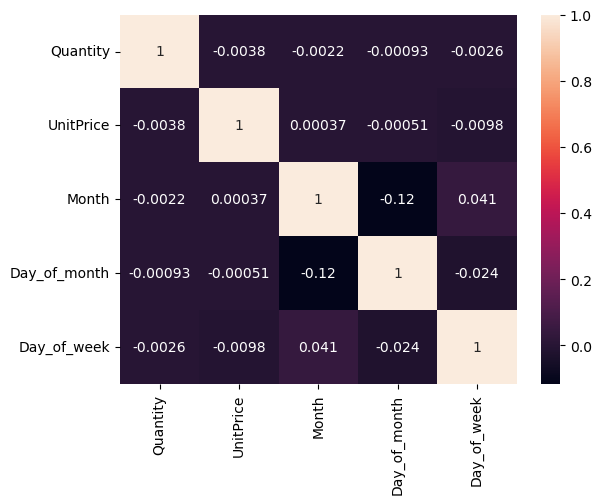

In [32]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

####  preprocessing for model

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
df_model = df.drop(columns=['Description','InvoiceDate'])
df_model = df_model[(df_model['Country'].isin(top_countries)) & (df_model['StockCode'].isin(top_stokes))]

X = df_model.drop(columns=['Quantity'])
y = df_model['Quantity']

X = pd.get_dummies(X, columns=X.select_dtypes('object').columns,drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (19567, 27)
y_train shape (19567,)
X_test shape (8387, 27)
y_test shape (8387,)


### Model Building


In [37]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [49]:
model = Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32,activation='sigmoid'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1792      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3905 (15.25 KB)
Trainable params: 3905 (15.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(optimizer='sgd', loss= 'mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
612/612 [==============================] - 1s 1ms/step - loss: 3043.9819 - val_loss: 4154.2090
Epoch 2/20
612/612 [==============================] - 1s 1ms/step - loss: 3024.2083 - val_loss: 4139.3164
Epoch 3/20
612/612 [==============================] - 1s 1ms/step - loss: 3021.8713 - val_loss: 4191.5195
Epoch 4/20
612/612 [==============================] - 1s 1ms/step - loss: 3021.4521 - val_loss: 4142.5718
Epoch 5/20
612/612 [==============================] - 1s 1ms/step - loss: 3024.0942 - val_loss: 4142.8403
Epoch 6/20
612/612 [==============================] - 1s 1ms/step - loss: 3026.9280 - val_loss: 4144.0459
Epoch 7/20
612/612 [==============================] - 1s 1ms/step - loss: 3023.3438 - val_loss: 4153.1406
Epoch 8/20
612/612 [==============================] - 1s 1ms/step - loss: 3022.3628 - val_loss: 4137.1782
Epoch 9/20
612/612 [==============================] - 1s 1ms/step - loss: 3021.5620 - val_loss: 4140.8062
Epoch 10/20
612/612 [=========================

In [51]:
preds = model.predict(X_test).reshape(-1,)
res = pd.DataFrame()
res['Actual'] = y_test.values
res['preds'] = preds
res

263/263 [==============================] - 0s 647us/step


,Actual,preds
0,12,4.930229
1,10,8.655377
2,18,5.344729
3,14,9.409575
4,6,15.613260
...,...,...
8382,2,8.627873
8383,10,7.255790
8384,10,11.037716
8385,1,10.576242
